# PyMC

ベイズ推定用のライブラリ

[Home — PyMC project website](https://www.pymc.io/welcome.html)

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.17.0


In [4]:
# コンテキストを作る
model = pm.Model()
with model:
    x = pm.Binomial("x", p=0.5, n=5)

In [5]:
x

x ~ Binomial(5, 0.5)

In [10]:
# コンテキスト（with句）の中でならModelと紐づけられる
with model:
    # 事前分布の予測値を取得
    prior_samples = pm.sample_prior_predictive(random_seed=0, draws=500)

Sampling: [x]


In [9]:
prior_samples

Inference data with groups:
	> prior

In [14]:
# arviz: 可視化ライブラリ
import arviz as az
az.summary(prior_samples)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,2.482,1.142,0.0,4.0,0.05,0.037,513.0,441.0,NaN


<AxesSubplot:>

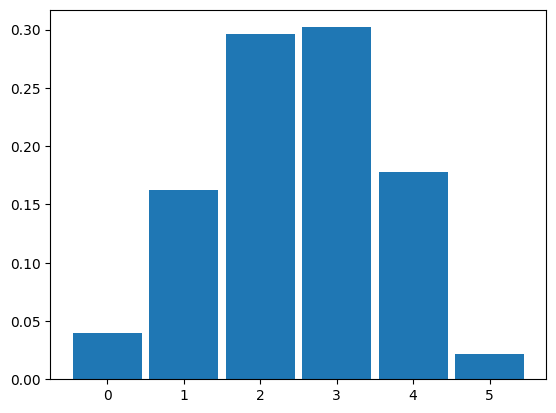

In [17]:
import numpy as np
x_samples: np.array = prior_samples["prior"]["x"].values
az.plot_dist(x_samples)

## モデルの定義とグラフ表記

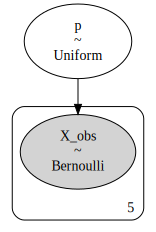

In [34]:
import pymc as pm
import numpy as np

# 観測値
X = np.array([1, 0, 0, 1, 0])

model = pm.Model()
with model:
    # パラメータpが一様分布に従うと定義
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    # 観測値Xがベルヌーイ分布に従うと定義
    X_obs = pm.Bernoulli("X_obs", p=p, observed=X)

# モデルをGraphvizで表示
pm.model_to_graphviz(model)

### MCMC

In [40]:
with model:
    idata = pm.sample(
        chains=3,
        tune=1000, # バーンイン期間の、捨てるサンプル数
        draws=1000, # 採用するサンプル数
        random_seed=0,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


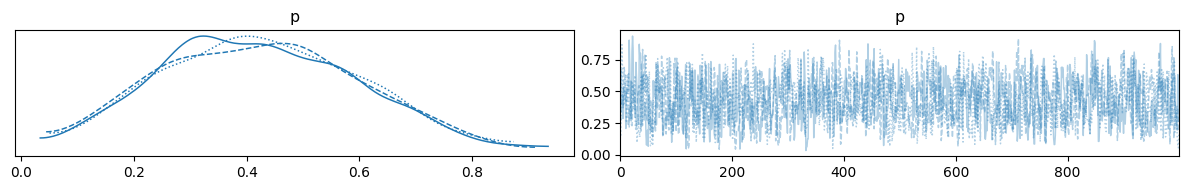

In [41]:
# 各chainsの結果を表示
az.plot_trace(idata)
plt.tight_layout()

<AxesSubplot:title={'center':'p'}>

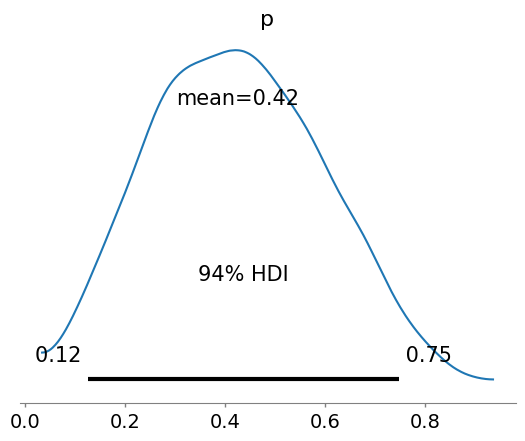

In [42]:
az.plot_posterior(idata)

In [44]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.424,0.172,0.125,0.747,0.005,0.004,1051.0,1663.0,1.0
